# Dependencies

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from sqlalchemy import create_engine

# Connecting to Postgres Database

In [133]:
username="webuser"
password="postgres"
db_name="Employees"
hostname="localhost"
engine = create_engine(f'postgresql://{username}:{password}@{hostname}:5432/{db_name}')
connection = engine.connect()

In [134]:
employees_salaries = pd.read_sql("select T.title, S.salary from employees E join salaries S on E.emp_no = S.emp_no join titles T on E.emp_title_id = T.title_id ", connection)
employees_salaries.head()

,title,salary
0,Engineer,48973
1,Senior Engineer,40000
2,Technique Leader,43548
3,Staff,63377
4,Senior Engineer,40000


# Creating bins and group labels

In [135]:
bins = [39999, 49999, 59999, 69999, 79999, 89999,
        99999, 109999, 119999, 129999]

# Create labels for these bins
group_labels = ["40K to 50k", "50k to 60k", "60k to 70k", "70k to 80k", "80k to 90k", "90k to 100k", "100k to 110k",
                "110k to 120k", "120k to 130k" ]

In [136]:
employees_salaries["Salary Range"] = pd.cut(employees_salaries["salary"], bins, labels=group_labels)
employees_salaries

,title,salary,Salary Range
0,Engineer,48973,40K to 50k
1,Senior Engineer,40000,40K to 50k
2,Technique Leader,43548,40K to 50k
3,Staff,63377,60k to 70k
4,Senior Engineer,40000,40K to 50k
...,...,...,...
300019,Staff,40000,40K to 50k
300020,Technique Leader,40000,40K to 50k
300021,Senior Engineer,59703,50k to 60k
300022,Senior Engineer,48038,40K to 50k


In [137]:
# Just grouping to make sure of number

employees_salaries_salary_groups = employees_salaries.groupby ("Salary Range").count()
employees_salaries_salary_groups

,title,salary
Salary Range,,
40K to 50k,158465,158465
50k to 60k,57915,57915
60k to 70k,41413,41413
70k to 80k,24814,24814
80k to 90k,11845,11845
90k to 100k,4284,4284
100k to 110k,1069,1069
110k to 120k,195,195
120k to 130k,24,24


# histogram to visualize the most common salary ranges for employees.

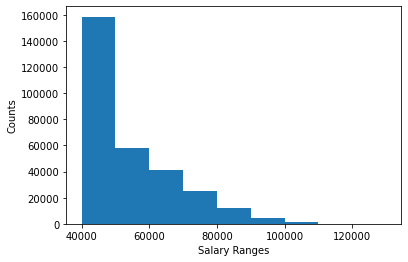

<Figure size 432x288 with 0 Axes>

In [138]:
plt.hist(employees_salaries["salary"],bins)
plt.xlabel('Salary Ranges')
plt.ylabel('Counts')
plt.show()
plt.tight_layout()

# bar chart of average salary by title.

In [139]:
employees_titles_salary_avg = round(employees_salaries.groupby("title")["salary"].mean(),2)
employees_titles_salary_avg

title
Assistant Engineer    48564.43
Engineer              48535.34
Manager               51531.04
Senior Engineer       48506.80
Senior Staff          58550.17
Staff                 58465.38
Technique Leader      48582.90
Name: salary, dtype: float64

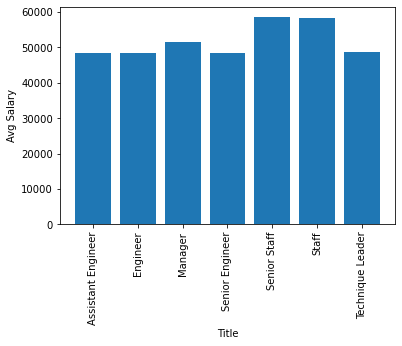

In [140]:
plt.bar(employees_titles_salary_avg.index.values, employees_titles_salary_avg.values)
plt.xticks(rotation=90)
plt.xlabel('Title')
plt.ylabel('Avg Salary')
plt.show()

# search data base by employee padge number:

In [141]:
padge_no = input("Enter the emp padge number:") 
search_emp_id = pd.read_sql(f"select E.emp_no, T.title, E.first_name, E.last_name, sex, E.hire_date, S.salary from employees E join salaries S on E.emp_no = S.emp_no join titles T on E.emp_title_id = T.title_id where E.emp_no = {padge_no}", connection)
search_emp_id.head()

Enter the emp padge number:499942


,emp_no,title,first_name,last_name,sex,hire_date,salary
0,499942,Technique Leader,April,Foolsday,F,2/10/1997,40000
